In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import missingno as msno
import seaborn as sn

variable1 is object with 42 nulls and its unique values are: 
['a' 'b' nan]
variable2 is object with 42 nulls and its unique values are: 
['17,92' '16,92' '31,25' '48,17' '32,33' '34,83' '26,17' '21,17' '28,92'
 '18,17' '24,75' '31,75' '18,25' '17,58' '51,83' '26,67' '31,42' '25,67'
 '33,75' '32,75' '39,83' '40,33' '35,25' '24,33' '15,75' '45' '30,42' nan
 '17,25' '38,58' '22,67' '49' '27,83' '16,5' '36,67' '47,25' '33,67'
 '33,17' '25' '48,5' '37,42' '18' '56,5' '25,75' '22,58' '32' '40,83'
 '59,67' '42,5' '28,08' '37,75' '53,92' '47,67' '23,25' '54,58' '34,25'
 '27,58' '46' '60,92' '47,42' '37,33' '33,25' '24,58' '21,83' '15,17'
 '22,92' '69,5' '33' '23' '22' '20,75' '20,67' '48,75' '22,75' '42,25'
 '27,67' '28,75' '23,5' '29,5' '31,92' '18,83' '26,75' '27,17' '47,17'
 '23,75' '41,58' '26,33' '39,42' '44,83' '50,75' '19,17' '21,5' '25,58'
 '20,42' '44,17' '34,75' '20,5' '22,08' '42,83' '18,92' '52,83' '36,25'
 '20,33' '28,17' '23,92' '56' '30,5' '45,83' '39' '28,25' '28,67' '22,5'
 '

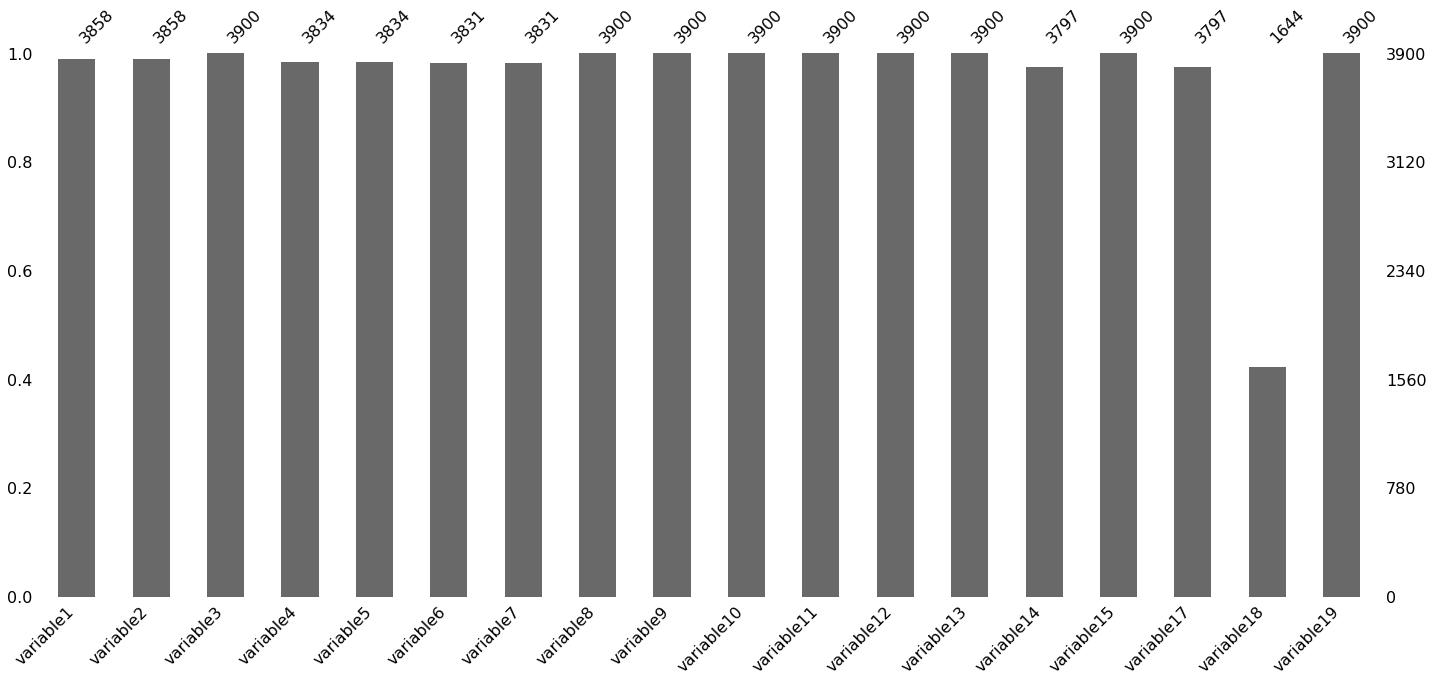

In [2]:
#load data
training=pd.read_csv('training.csv', sep=';')
validation=pd.read_csv('validation.csv', sep=';')
X=pd.concat([training,validation])

#label encoding
Y=X['classLabel'].map({'yes.':1,'no.':0})
X=X.drop(['classLabel'],axis=1)
YTrain=Y[:3700]
YTest=Y[3700:]
#data exploration
msno.bar(X)
for column in X:
    print(column +' is '+str(X[column].dtypes) +' with '+str(X[column].isnull().sum())+ ' nulls and its unique values are: ')
    print(X[column].unique())
# Notes:
#     1. most variables are non numeric
#     2. alot of missing data specially in variable18 with more than half the data missing
#     3. variables 2,3 and 8 are numeric strings that can be read as float since
#        there are no values with 0 after the comma which proves its not a tuple

In [3]:
# Decisions:
#     1. any non numeric missing value will be replaced with the mode 
#       (including binary values before mapping it as missing values are so little it wont cause skewing)
#     2. variables 2,3 and 8 will be casted as float
#     3. all non binary non numeric values will be one hot encoded
#     4. all numeric missing values will be replaced with the mean
#     5. variable18 will be dropped as more than half of it is missing

#data pre processing

def preProc(X):
    X['variable1']=X['variable1'].fillna(X['variable1'].mode().iloc[0])
    X['variable4']=X['variable4'].fillna(X['variable4'].mode().iloc[0])
    X['variable5']=X['variable5'].fillna(X['variable5'].mode().iloc[0])
    X['variable6']=X['variable6'].fillna(X['variable6'].mode().iloc[0])
    X['variable7']=X['variable7'].fillna(X['variable7'].mode().iloc[0])

    X['variable2']=X['variable2'].str.replace(',','.')
    X['variable2']=pd.to_numeric(X['variable2'])
    X['variable2']=X['variable2'].fillna(X['variable2'].mean())

    X['variable3']=X['variable3'].str.replace(',','.')
    X['variable3']=pd.to_numeric(X['variable3'])
    X['variable3']=X['variable3'].fillna(X['variable3'].mean())

    X['variable8']=X['variable8'].str.replace(',','.')
    X['variable8']=pd.to_numeric(X['variable8'])
    X['variable8']=X['variable8'].fillna(X['variable8'].mean())

    X['variable14']=X['variable14'].fillna(X['variable14'].mean())
    X['variable17']=X['variable17'].fillna(X['variable17'].mean())
    
    X['variable1']=X['variable1'].map({'a':1,'b':0})
    X['variable9']=X['variable9'].map({'t':1,'f':0})
    X['variable10']=X['variable10'].map({'t':1,'f':0})
    X['variable12']=X['variable12'].map({'t':1,'f':0})

    return X

In [4]:
#one hot encoding
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

In [20]:
#Confusion matrix visulization using heat map and classification report

def PltResult(model,testx,testy):
    #print(accuracy_score(testy, model.predict(testx)))
    print(classification_report(testy, model.predict(testx)))
    plt.rcParams['figure.figsize'] = (5, 5)
    sn.heatmap(confusion_matrix(testy, model.predict(testx)), annot = True)
    plt.title('Confusion Matrix', fontsize = 20)

In [6]:
#start preproc
X1=preProc(X)
X1=X1.drop(['variable18'],axis=1)
features_to_encode = ['variable4', 'variable5', 'variable6',
                      'variable7','variable13']
for feature in features_to_encode:
    X1 = encode_and_bind(X1, feature)
X1Train=X1[:3700]
X1Test=X1[3700:]

3700
200


0.52
              precision    recall  f1-score   support

           0       0.55      0.55      0.55       107
           1       0.48      0.48      0.48        93

   micro avg       0.52      0.52      0.52       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.52      0.52      0.52       200

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       276
           1       1.00      1.00      1.00      3424

   micro avg       1.00      1.00      1.00      3700
   macro avg       1.00      1.00      1.00      3700
weighted avg       1.00      1.00      1.00      3700



C:\Users\Momen\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


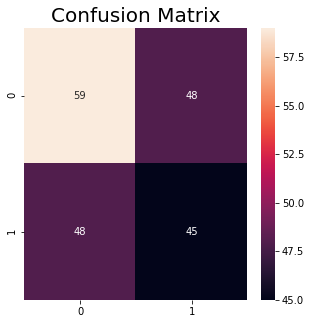

In [7]:
#Classification

from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier()
RF.fit(X1Train,YTrain)
PltResult(RF,X1Test,YTest)

C:\Users\Momen\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[1.         0.99864865 1.         1.         1.        ]
0.495
              precision    recall  f1-score   support

           0       0.53      0.50      0.51       107
           1       0.46      0.49      0.48        93

   micro avg       0.49      0.49      0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.50      0.49      0.50       200



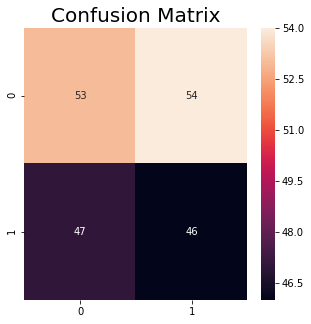

In [8]:
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score,cross_val_predict
# from sklearn.linear_model import LogisticRegression
# # prepare the cross-validation procedure
# cv = KFold(n_splits=5, random_state=1, shuffle=True)
# cv.split(X1Train)
# # create model
# model = RandomForestClassifier()
# model.fit(X1Train,YTrain)
# scores = cross_val_score(model, X1Train, YTrain, cv=cv, n_jobs=-1)

# # report performance
# print(scores)
# PltResult(model,X1Test,YTest)

C:\Users\Momen\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.555
              precision    recall  f1-score   support

           0       0.55      0.91      0.69       107
           1       0.58      0.15      0.24        93

   micro avg       0.56      0.56      0.56       200
   macro avg       0.57      0.53      0.46       200
weighted avg       0.57      0.56      0.48       200



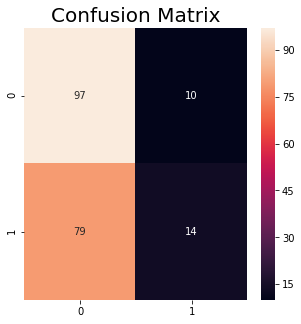

In [9]:
from sklearn.svm import SVC

SVM=SVC()
SVM.fit(X1Train,YTrain)
PltResult(SVM,X1Test,YTest)

C:\Users\Momen\Anaconda3\lib\site-packages\dask\config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\Momen\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


0.495
              precision    recall  f1-score   support

           0       0.53      0.50      0.51       107
           1       0.46      0.49      0.48        93

   micro avg       0.49      0.49      0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.50      0.49      0.50       200

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       276
           1       1.00      1.00      1.00      3424

   micro avg       1.00      1.00      1.00      3700
   macro avg       1.00      1.00      1.00      3700
weighted avg       1.00      1.00      1.00      3700



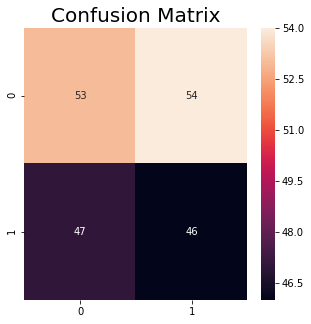

In [10]:
import xgboost

xgb=xgboost.XGBClassifier()
xgb.fit(X1Train,YTrain)
PltResult(xgb,X1Test,YTest)

In [77]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
def create_model(lyrs=[1], act='relu', opt='Adam', dr=0.5):
    
    model = Sequential()
    
    # create first hidden layer
    model.add(Dense(lyrs[0], input_dim=X1Train.shape[1], activation=act))
    
    # create additional hidden layers
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    
    # add dropout, default is none
    model.add(Dropout(dr))
    
    # create output layer
    model.add(Dense(1, activation='sigmoid'))  # output layer
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

NN=create_model()
print(NN.summary())
training = NN.fit(X1Train, YTrain, epochs=100, batch_size=128, validation_split=0.3, verbose=0)
val_acc = np.mean(training.history['val_acc'])
print("\n%s: %.2f%%" % ('val_acc', val_acc*100))
_, test_acc = NN.evaluate(X1Test, YTest, verbose=0)
print(test_acc)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_124 (Dense)            (None, 1)                 45        
_________________________________________________________________
dropout_60 (Dropout)         (None, 1)                 0         
_________________________________________________________________
dense_125 (Dense)            (None, 1)                 2         
Total params: 47
Trainable params: 47
Non-trainable params: 0
_________________________________________________________________
None

val_acc: 26.64%
0.615


In [78]:
# final thoughts:
#     no mater what algorithm is used it never gets higher than 61% accuracy score plus the fact the data
#     always overfits regardless of algorithm or Deeplearning network used which might be caused by the
#     fact that this is a mock data.
#     having mock data means the values have little to no meaning which makes feature selection hard
#     the only next step is using only some features for training otherwise the data will keep overfitting
